In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import *
import copy

In [16]:
df = pd.read_csv('walmart_data.csv') # for making changes
df_org = pd.read_csv('walmart_data.csv') # to refer to original dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Analyzing basic metrics**



The purpose of analyzing basic metrics is to find the shape of our dataset, what datatypes are the features and number of unique values in each feature.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## Observations-

*   There are 4,00,699 rows and 10 columns in the data.
*   There are no null values.
*   The columns user_id,  have integer datatype.
*   The columns occupation(masked), marital_status, product_category and purchase have float datatype.
*   Rest of the columns(product_id, gender, age, city_category, stay_in_current_city_years) are object datatype.

In [18]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## Observations-

* The columns gender, age, city_category, stay_in_current_city_years and marital status can be converted into category datatype.

Converting gender, age, city_category, stay_in_current_city_years and marital status into categorical data-

In [19]:
temp = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
for i in temp:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


## **Statistical Summary**

The below code will tell us the mean, median, min, max, standard deviation etc. for numerical features. Although, here only ‘Purchase’ will be of use to us.

In [20]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


## Observations-

* Range of purchase amount is 185 dollars to 23961 dollars.
* Mean purchase amount is 9325 dollars.
* Median purchase amount is 8061 dollars.
* Standard deviation of purchase amount is 4976 dollars.
* Inter quartile range of purchase amount is 5866 to 12065 dollars.

## **Value Counts and Unique Attributes**

Value counts means the number of times a value occurs in a column. The code below gives the result sorted in descending order of counts by default. This will tell us things like which customers are most frequent buyers, what is the maximum number of purchases a customer as made etc.

In [21]:
# Value counts for first 5 columns
for i in df.columns[:5]:
    print('Value counts for column',i,'-')
    print(df[i].value_counts())
    print('-'*50)

Value counts for column User_ID -
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
--------------------------------------------------
Value counts for column Product_ID -
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
--------------------------------------------------
Value counts for column Gender -
M    414259
F    135809
Name: Gender, dtype: int64
--------------------------------------------------
Value counts for column Age -
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
--------------------------------------------------
Value counts f

In [22]:
for i in df.columns[5:]:
    print('Value counts for column',i,'-')
    print(df[i].value_counts())
    print('-'*50)

Value counts for column City_Category -
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
--------------------------------------------------
Value counts for column Stay_In_Current_City_Years -
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
--------------------------------------------------
Value counts for column Marital_Status -
0    324731
1    225337
Name: Marital_Status, dtype: int64
--------------------------------------------------
Value counts for column Product_Category -
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64
--------------------------------------------------
Value counts for column Purchase -
7011     191
7193     188
6855     187
6891   

## Obervations-

*   Most frequent users have made close to 700 purchases.
*   Least frequent users have made 3 or 4 purchases.
*   ‘P00265242’ is the most sold product.
*   301,958 users in the dataset are male and 98,740 female.
*   People in age group 26–35 make more purchases than any other age group.
*   People of city_category 'B' make more purchases than other city city_categories.
*   Unmarried people make more purchases than married people.
*   Product categories 5, 1 and 8 sell more than other categories.
*   Product categories 17 and 9 sell the least.
*   People who have stayed in their city for only one year make more purchases than others.
*   People who have stayed for less than a year or more than 4 years make least number of purchases.




## **Insights** -

*   Walmart can keep products like P00265242 and P00025442 (which are
selling a lot) in the inventory. Products like P00056342 P00350742 (which are not selling) need not be kept in store.

*   Ads can be targetted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.

*   Ads can be targetted towards people of city category B. Inventory in these cities can be replenished.
*   Ads can be targetted towards people who have spent between 1 to 2 years in their cities.
*   Ads can be targetted towards unmarried people.
*   Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.

## **Missing Values and Outlier Detection**

Outliers are values in a column which are either very high or very low compared to most other values in the column. Presence of outliers can lead to misleading analysis specially when metrics like mean and sum are concerned. Let’s check if there are any outliers in the ‘Purchase’ column. We will use the IQR method for finding outliers.

In [23]:
for i in ['Purchase']:
    outliers = []
    p25 = np.percentile(df[i], 25)
    p75 = np.percentile(df[i], 75)
    iqr = p75 - p25
    max_cut = p75 + iqr*1.5
    min_cut = max(0, p25 - iqr*1.5)
    outliers = df.loc[(df[i]<min_cut) | (df[i]>max_cut),i]
    print('Outliers for the column',i,'-')
    print(outliers)
    print('Number of outliers-', len(outliers))
    print('Percentage of outliers =', round((len(outliers)/len(df[i]))*100,2),'%')


Outliers for the column Purchase -
343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64
Number of outliers- 2677
Percentage of outliers = 0.49 %


Purchase columns contains 2677 outliers. This is 0.49% of total number of entries.

Let’s confirm if there are any missing values in the data.

In [24]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

##**Visual Analysis**

Graphs can be a useful way to draw insights. Some plots can be generated from a single feature. We will use box plots, distribution plots and count plots for univariate analysis.

#### Creating a box plot for ‘Purchase’ feature.

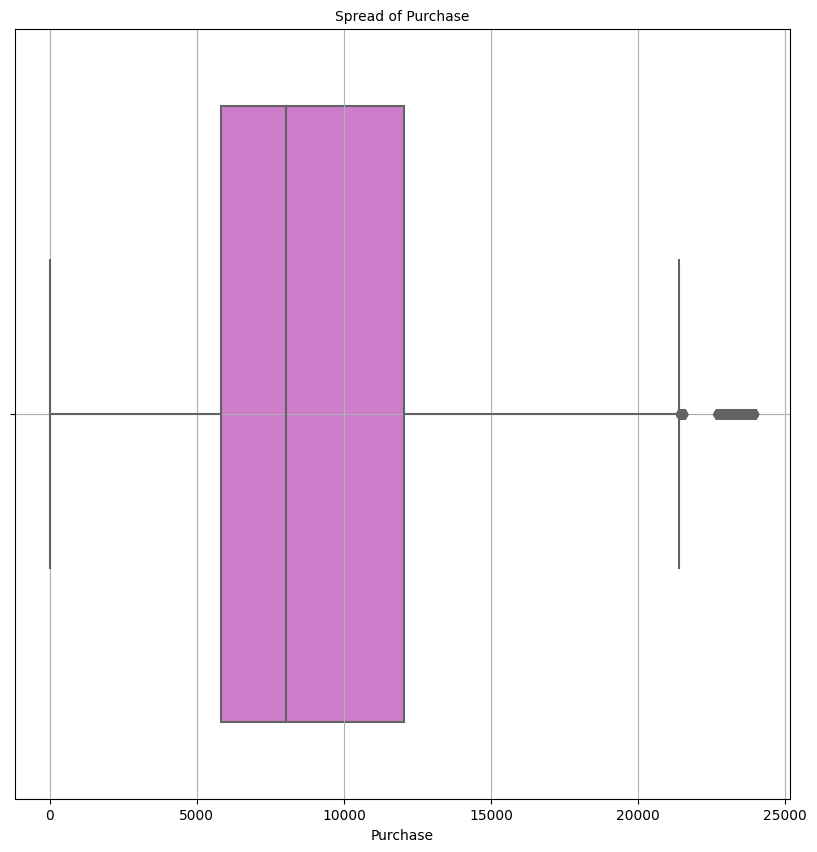

In [25]:
temp = ['Purchase']
plt.figure(figsize = (10,10))
for i in range(len(temp)):
    sns.boxplot(x = df[temp[i]],color = 'orchid')
    plt.title('Spread of Purchase'.format(feature = temp[i]), fontsize = 10)
    plt.grid()
plt.show()

## **Observations**-

*  Median purchase is about 8000 dollars.
*  There are many outliers.
*  Inter Quartile Range is 6000 to 12000 dollars.

## **Insights-**

Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.

Creating distribution plots for Purchase, Product_Category and Occupation.

Note that occupation data is masked. We can only see a number assigned to each occupation. The distribution plot has probability density on y-axis and feature values on x-axis.

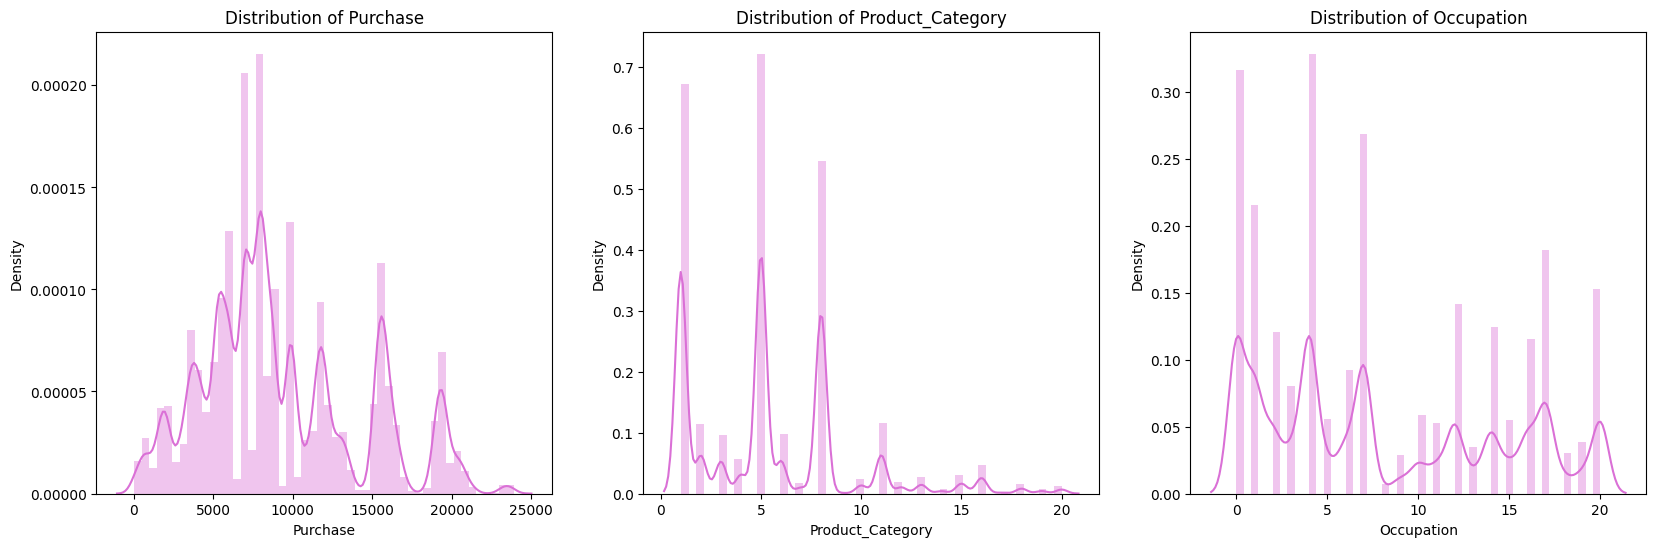

In [27]:
temp = ["Purchase", "Product_Category", "Occupation"]
plt.figure(figsize = (20, 6))
for i in range(len(temp)):
  plt.subplot(1, 3, i+1)
  sns.distplot(df[temp[i]], color = "orchid")
  plt.title('Distribution of {feature}'.format(feature = temp[i]))
plt.show()

## **Observations-**

*  Purchase amounts between 5000 to 10000 are maximum in number.
*  Purchase amounts range between 0 and 25000.
*  Product categories 1, 5 and 8 are most frequently purchased.
*  There are 20 product categories.
*  People with occupations 0, 4 and 7 make more purchase than other occupations.
*  There are 21 different occupations.

## **Insights**-

*  More products popular among people with occupations 0, 4 and 7 can be kept in store.

#### To analyze categorical features like gender and age groups, we will create count plots, where x-axis is the values in the feature and y-axis is the counts.####

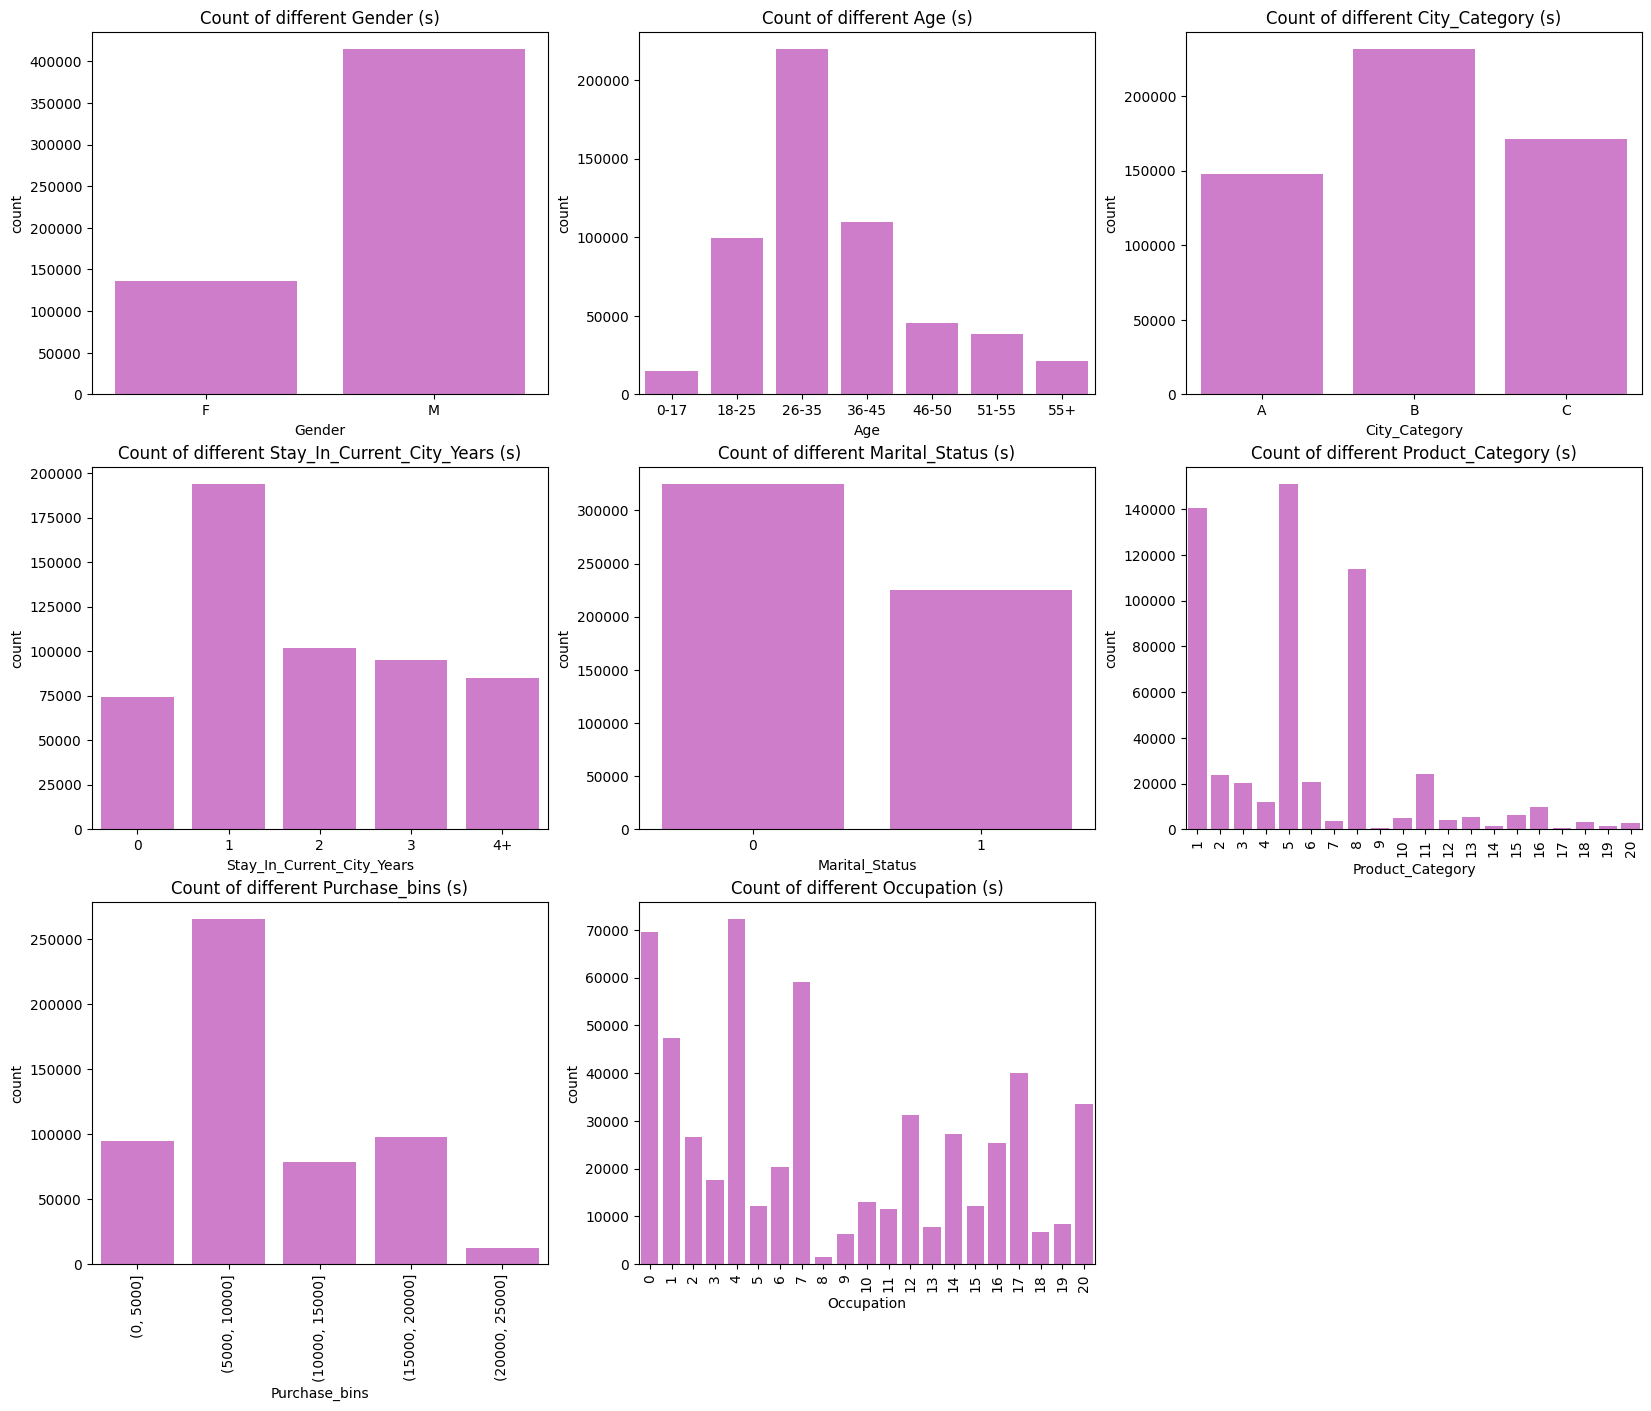

In [28]:
df['Purchase_bins'] = pd.cut(df['Purchase'], bins = [0, 5000, 10000, 15000, 20000, 25000])
plt.figure(figsize=(20, 16))
temp = ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category", "Purchase_bins", "Occupation"]
for i in range(len(temp)):
  plt.subplot(3, 3, i+1)
  sns.countplot(x = df[temp[i]], color="orchid")
  plt.title('Count of different {temp_i} (s)'.format(temp_i = temp[i]))
  if temp[i] in ['Purchase_bins']:
    plt.xticks(rotation = 90)
  if temp[i] in ['Occupation']:
    plt.xticks(rotation = 90)
  if temp[i] in ['Product_Category']:
    plt.xticks(rotation = 90)
plt.show()

## **Observations-**

*  More puchases have been made by males than females.
*  People of age group 26–35 have made the maximum number of purchases.
*  People in cities of category B have made maximum number of purchases.
*  People who have stayed in their city for a year have made the maximum *  number of purchases.
*  Unmarried people have made more purchases than married peole.
*  Products of category 1, 5 and 8 sold most frequently.
*  Purchases of amount (5000, 10000] were maximum in number.
*  People of occupation 0,4 and 7 have made more purchases than other occupations.
*  People of occupation 8 have made least purchases.

#### Now, we will use two variables to create plots. On the x-axis will be a categorical variable. On the y-axis will be purchase amount. A box plot will allow us to compare medians of different categories in a feature, as well as their IQR ranges. We won’t be using a bar plot because it won’t allow us to compare their range of values.

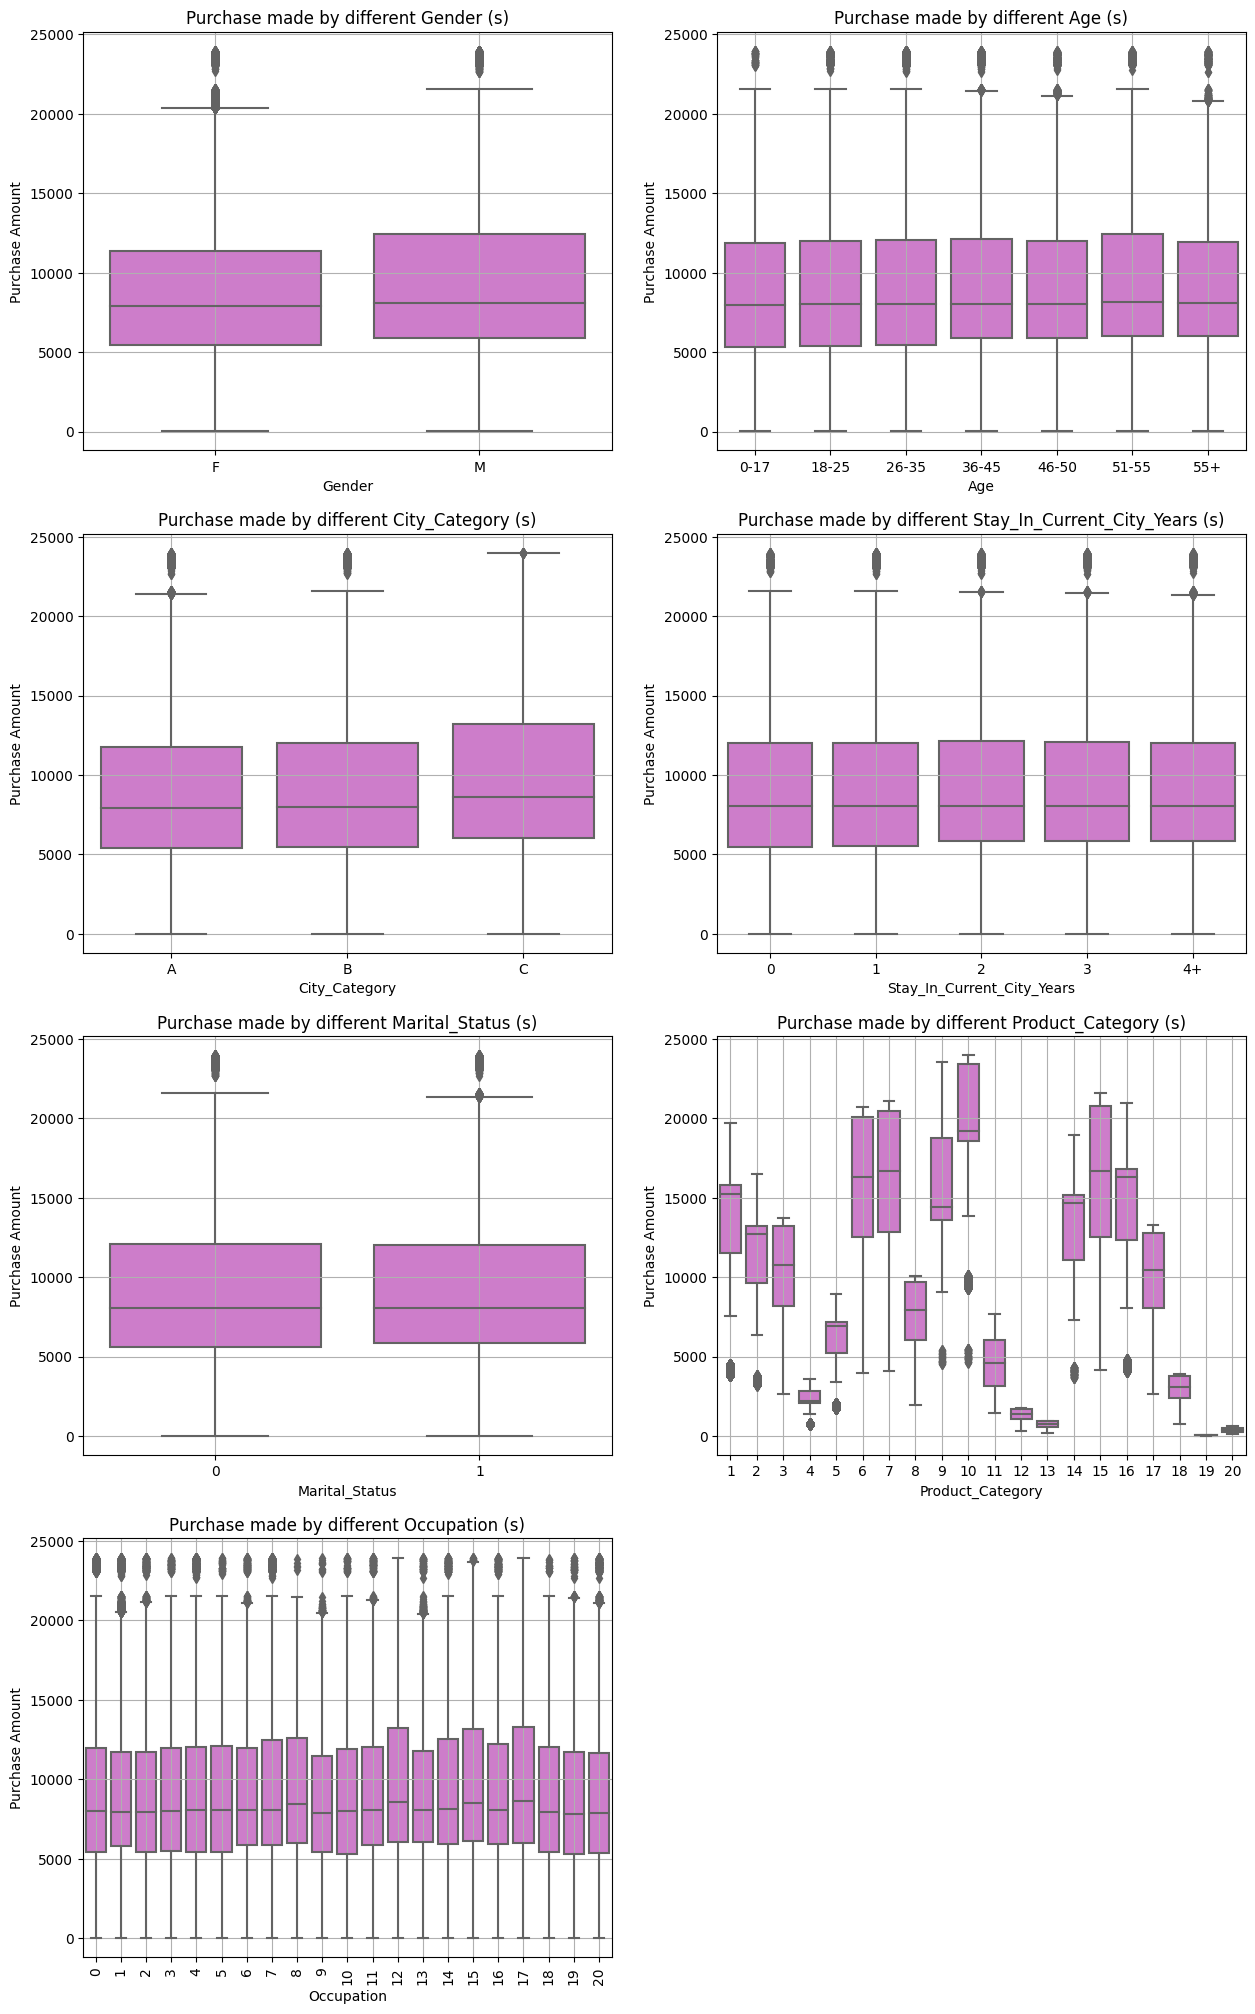

In [29]:
plt.figure(figsize = (15,25))
temp = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category','Occupation']
for i in range(len(temp)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = df[temp[i]], y = df['Purchase'], color = 'orchid')
    plt.title('Purchase made by different {temp_i} (s)'.format(temp_i = temp[i]))
    if temp[i] in ['Occupation']:
      plt.xticks(rotation = 90)
    plt.ylabel('Purchase Amount')
    plt.grid()
plt.show()

## **Observations-**

*  Median purchase amounts of males and females are similar.
*  Median purchase amounts of all age groups are similar.
*  Median purchase amount of city of category C is slightly higher than other city categories.
*  Median purchase amounts of product category 10 is highest.
*  Median purchase amount of occupations 12 and 17 are slightly higher than other occupations.

## **Insights-**

Ads for slightly expensive products can be targeted towards people with occupation 12 and 17. (See median expenses of all occupations below)

#### We will now find if there is any correlation between the numerical features in the data. To include categorical features like gender and age groups in our correlation analysis, we will convert them into numerical features.

In [30]:
# Converting Gender, Age and City_Category to numeric data-
df_copy = df_org.copy()
df_copy['Gender'].replace({'F': 1, 'M': 0}, inplace=True)
df_copy['Age'].replace({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7}, inplace=True)
df_copy['City_Category'].replace({'A': 1, 'B': 2, 'C': 3}, inplace=True)

#### We will plot all the numerical features against one-another in pairs. Because gender is a primary focus in our analysis, we will plot male and female data points in different colors. In the plot below, blue dots represent male data while orange dots represent female data.

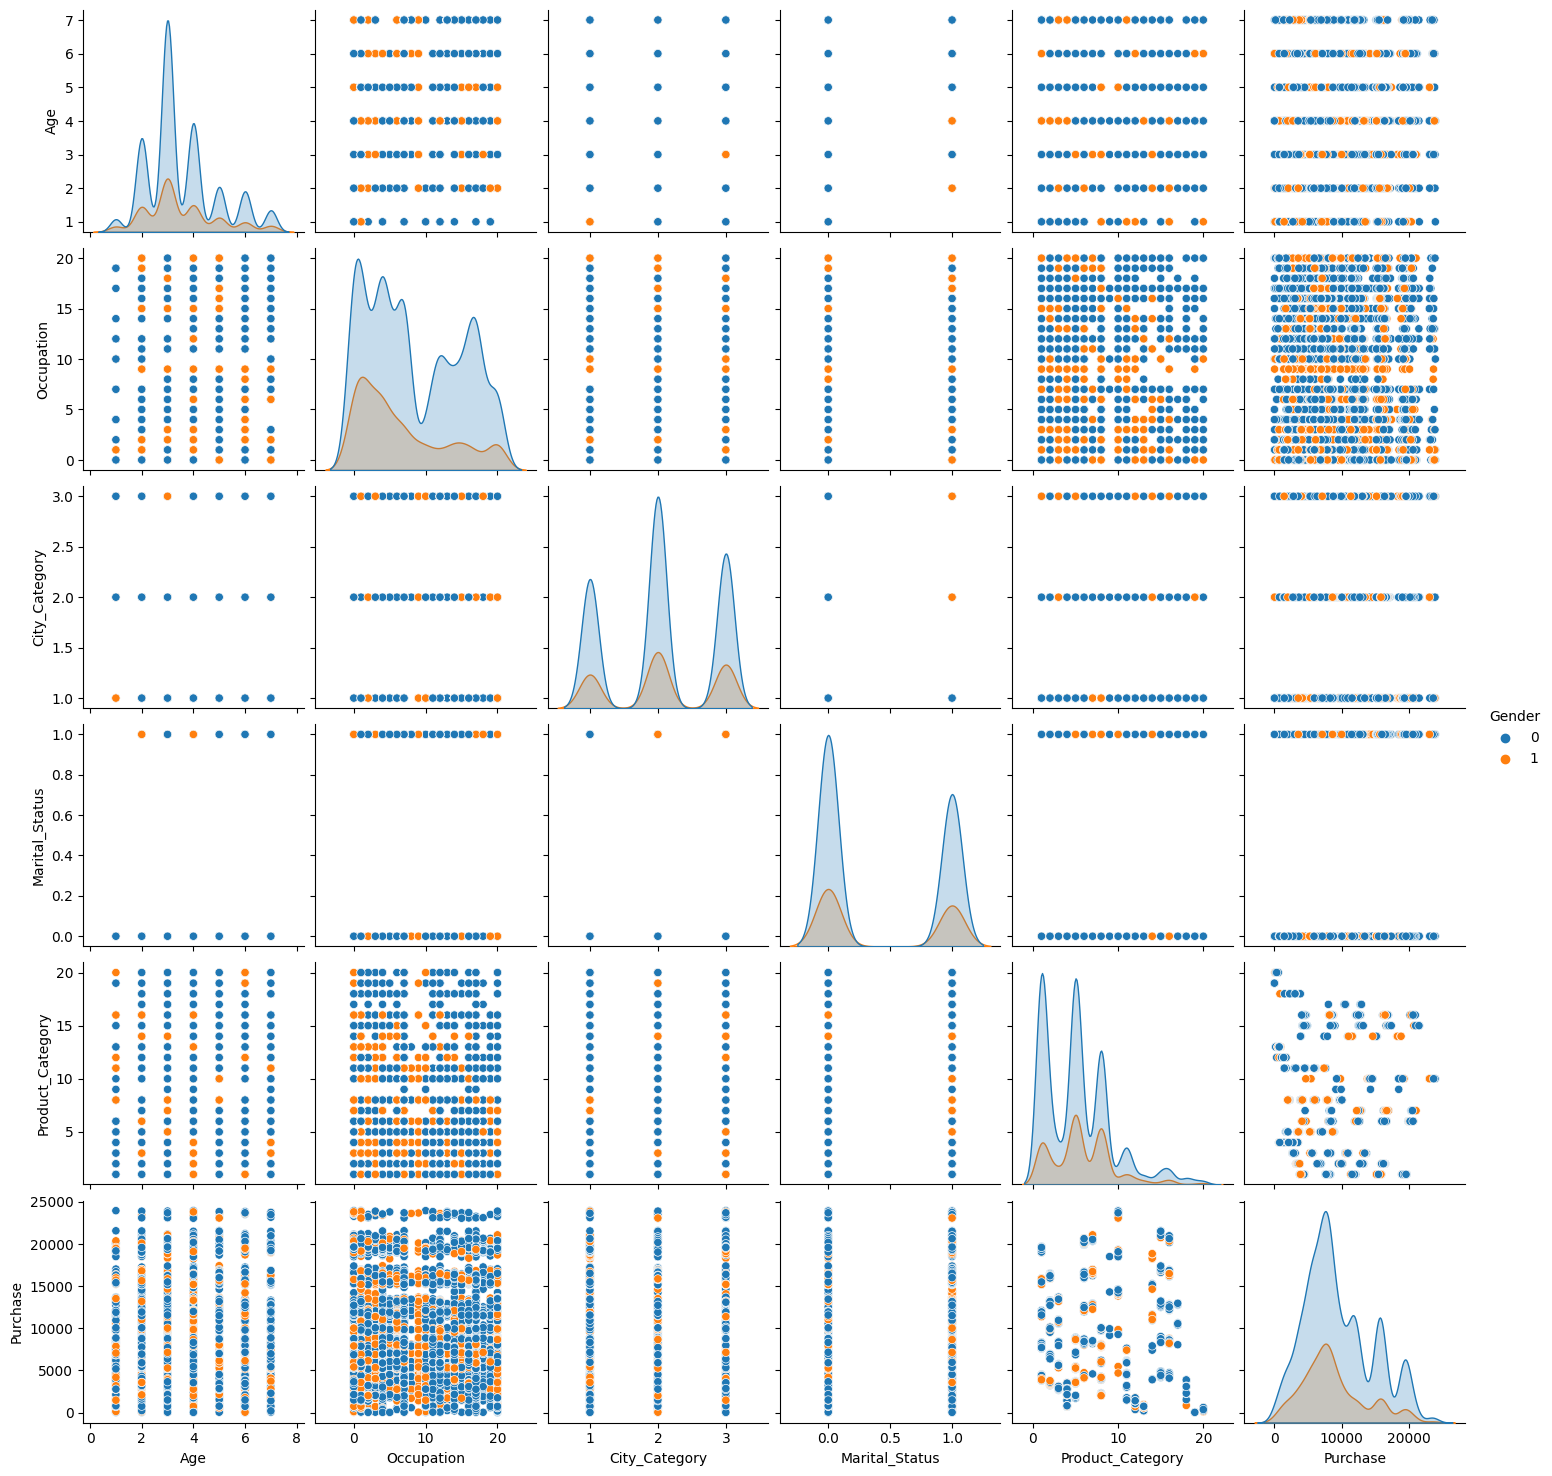

In [31]:
# Taking a sample of 10000 entries to create pair wise plots
# Blue color dots are male. Orange are female.
sns.pairplot(df_copy.sample(10000).iloc[:,1:], hue = 'Gender', diag_kind = 'kde')
plt.show()

## **Sampling**

We want to find a range within which a certain percentage of values will lie. This is called a **confidence interval**. The benefit of using a confidence interval as opposed to mean or median is that we can make assertions with greater confidence which can also be specified.

To, find confidence intervals we will have to take a number of samples and calculate their means. Then, to calculate 90 percent confidence interval for example, we find the 5th and 95th percentile values in all the means calculated from the samples.

The Central Limit Theorem states that the means of samples taken from any data, follow a gaussian distribution. We will verify this by plotting KDE plots of the means of samples.

1.  Male and Female users




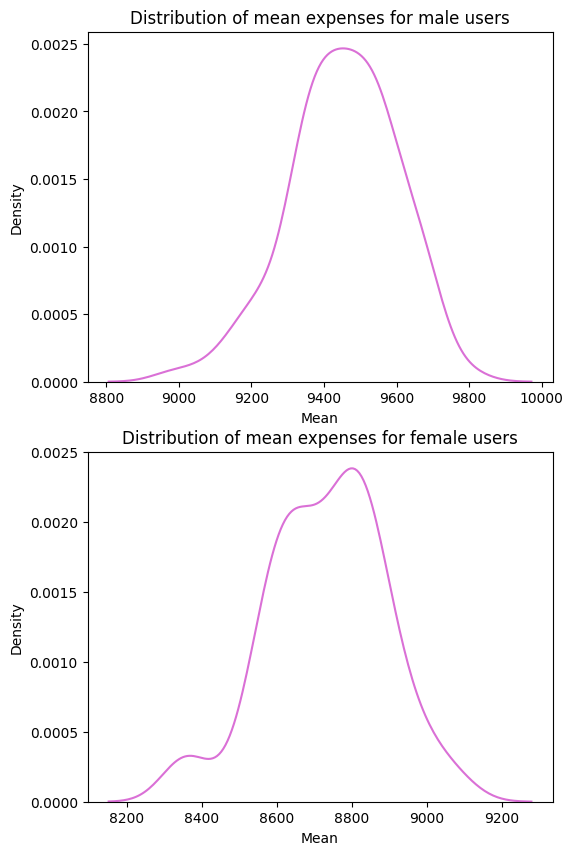

In [32]:
# Taking samples of 1000 entries for both genders and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6, 10))
x = 1
for j in ["M", "F"]:
  means = []
  for i in range(100):
    temp = df.loc[df['Gender']==j, 'Purchase'].sample(1000)
    avg = temp.mean()
    means.append(avg)
  plt.subplot(2, 1, x)
  sns.kdeplot(x=means, color="orchid")
  if j == 'M':
    gen = 'male'
    means_m = means
  else:
    gen = 'female'
    means_f = means
  plt.title('Distribution of mean expenses for {g} users'.format(g = gen), fontsize = 12)
  plt.xlabel("Mean")
  x += 1
plt.show()



### The distributions appear to be gaussian.

In [33]:
# Finding different confidence intervals for males and females
for i in ["males", "females"]:
  print('For {g}-'.format(g = i))
  if i == "males":
    means = means_m
    gen = "M"
  else:
    means = means_f
    gen = "F"
  print('Mean of sample means =',np.mean(means))
  print('Population mean =', np.mean(df.loc[df['Gender']==gen, 'Purchase']))
  print('Standard deviation of means (Standard Error) =', np.std(means))
  print('Standard deviation of population =',df.loc[df['Gender']==gen, 'Purchase'].std() )
  print('99% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
  print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
  print('95% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
  print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
  print('90% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
  print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
  print('-'*50)


For males-
Mean of sample means = 9452.488150000001
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 148.3898134899681
Standard deviation of population = 5092.18620977797
99% CONFIDENCE INTERVAL for mean expense by males users-
(9030.66, 9744.74)
95% CONFIDENCE INTERVAL for mean expense by males users-
(9148.08, 9690.59)
90% CONFIDENCE INTERVAL for mean expense by males users-
(9193.27, 9676.46)
--------------------------------------------------
For females-
Mean of sample means = 8731.30628
Population mean = 8734.565765155476
Standard deviation of means (Standard Error) = 155.51441935165252
Standard deviation of population = 4767.233289291458
99% CONFIDENCE INTERVAL for mean expense by females users-
(8340.37, 9077.45)
95% CONFIDENCE INTERVAL for mean expense by females users-
(8365.35, 9022.26)
90% CONFIDENCE INTERVAL for mean expense by females users-
(8475.35, 8961.53)
--------------------------------------------------


## **Observations-**

*  Mean purchase amount for females = 8734.56
*  Mean purchase amount for males = 9437.52
*  95% confidence interval for purchase amounts of females is less than males without any intersection.
*  We can say with 95% confidence that females spend less than males.


## Insights-

*  Ads for products which cost between 9148.08 and 9690.59 can be targetted towards males.
*  Ads for products which cost between 8365.35 and 9022.26 can be targetted towards females.

2. Married and Unmarried users

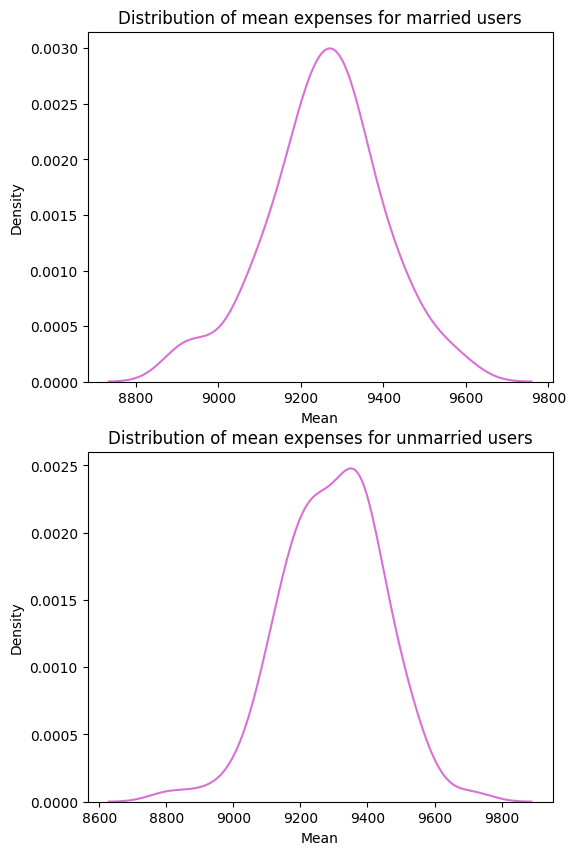

In [34]:
# Taking samples of 1000 entries for married and unmarried people and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df['Marital_Status']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 0:
        ms = 'unmarried'
        means_mr = means
    else:
        ms = 'married'
        means_umr = means
    plt.title('Distribution of mean expenses for {m} users'.format(m = ms), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [35]:
# Finding different confidence intervals for mean expense by married and unmarried customers
for i in ['married', 'unmarried']:
    print('For {m}-'.format(m = i))
    if i == 'married':
        means = means_mr
        ms = 1
    else:
        means = means_umr
        ms = 0
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Marital_Status']==ms, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Marital_Status']==ms, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For married-
Mean of sample means = 9295.44931
Population mean = 9261.174574082374
Standard deviation of means (Standard Error) = 148.0823392855945
Standard deviation of population = 5016.897377793055
99% CONFIDENCE INTERVAL for mean expense by married users-
(8860.44, 9644.89)
95% CONFIDENCE INTERVAL for mean expense by married users-
(9016.51, 9560.75)
90% CONFIDENCE INTERVAL for mean expense by married users-
(9080.69, 9512.0)
--------------------------------------------------
For unmarried-
Mean of sample means = 9257.554510000002
Population mean = 9265.907618921507
Standard deviation of means (Standard Error) = 139.67905758985458
Standard deviation of population = 5027.347858674449
99% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8906.81, 9585.62)
95% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8931.19, 9528.64)
90% CONFIDENCE INTERVAL for mean expense by unmarried users-
(9018.82, 9476.24)
--------------------------------------------------


##Observations-

*  Mean expense by married customers is 9261
*  Mean expense by unmarried customers is 9266


3. For different age groups-


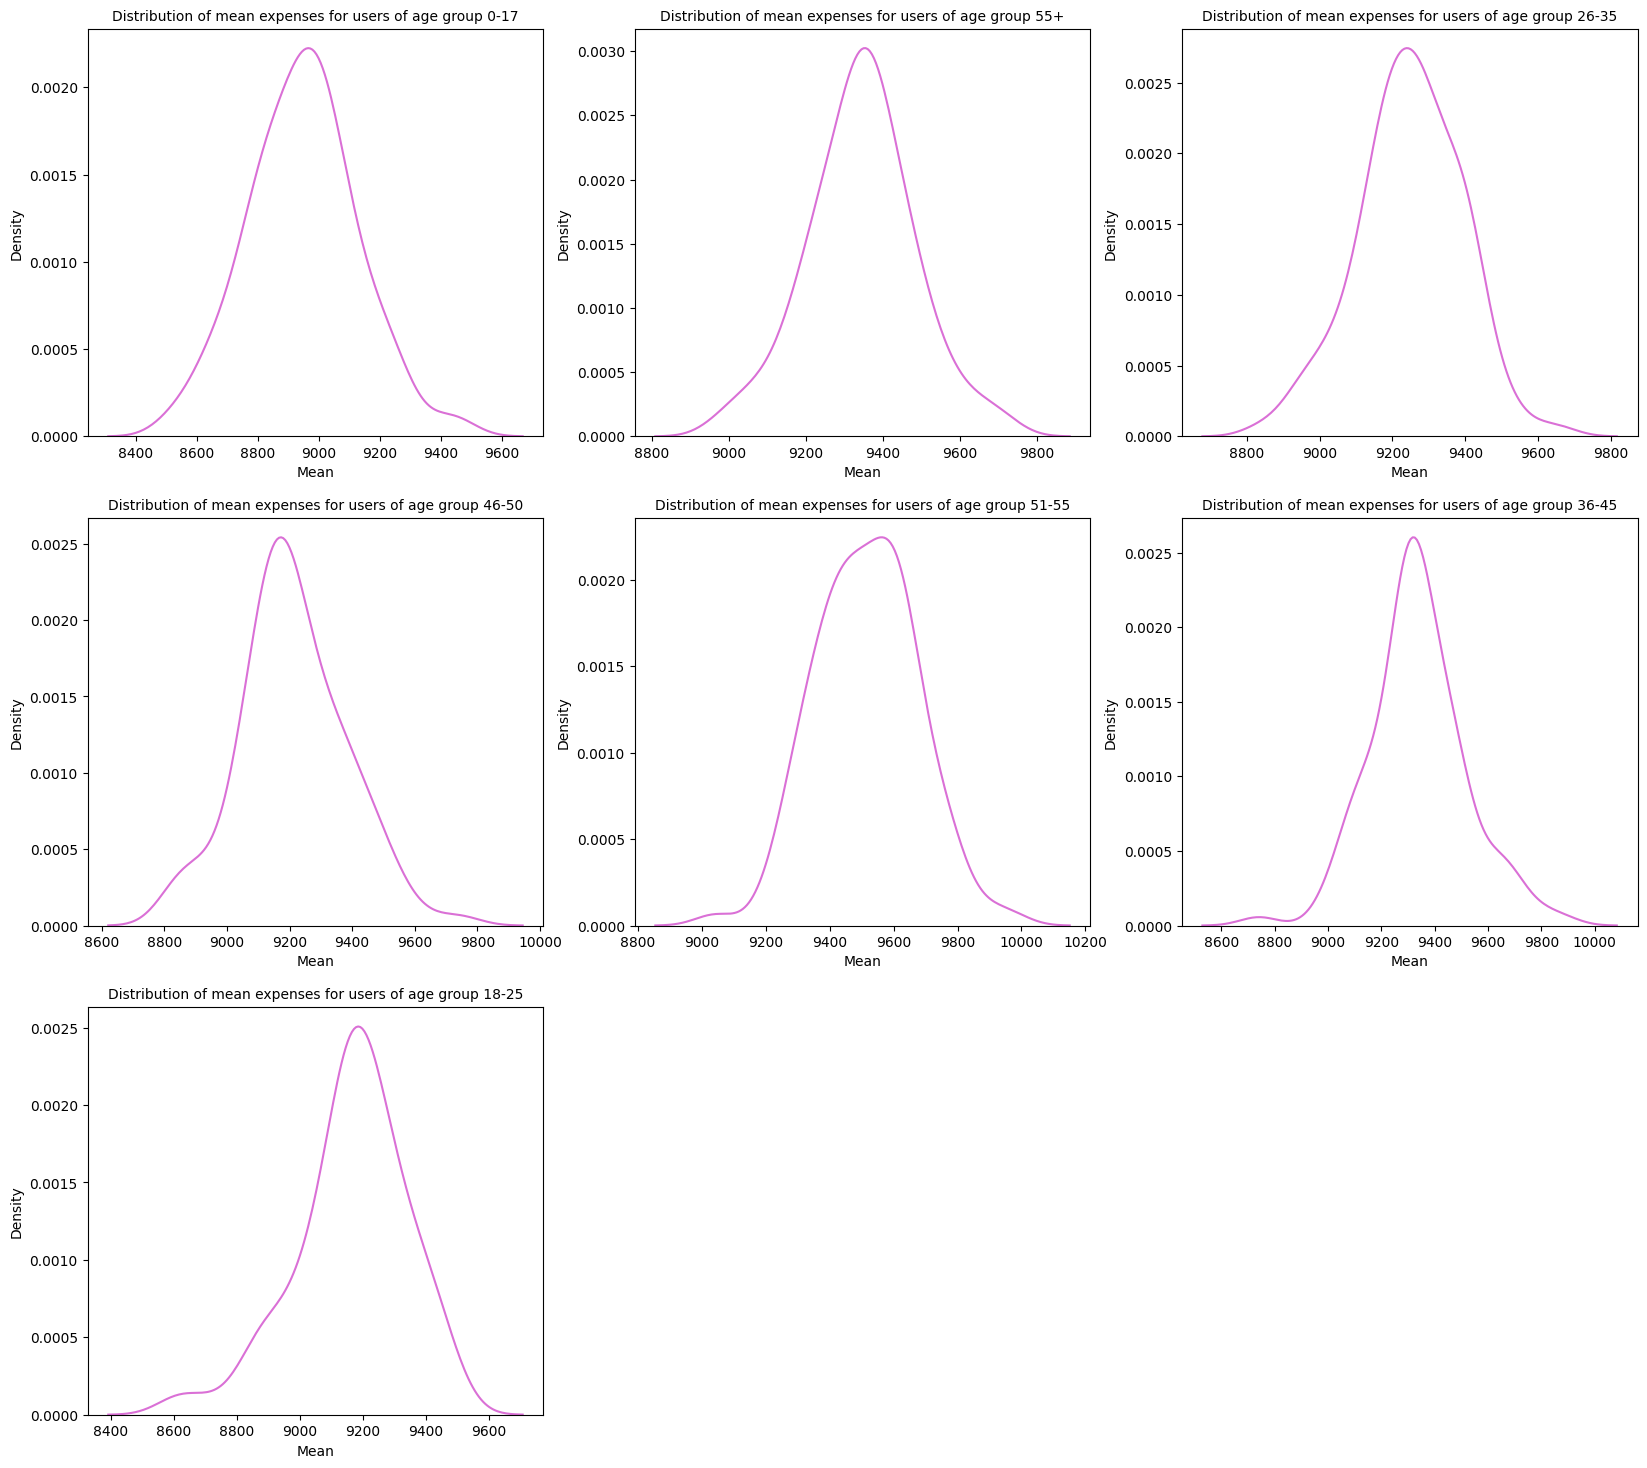

In [36]:
# Taking 100 samples of 1000 entries for each age group and
# Plotting KDE plots to see if their distribution looks gaussian
plt.figure(figsize=(20,18))
x = 1
for j in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    means = []
    for i in range(100):
        temp = df.loc[df['Age']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == '0-17':
        means_0 = means
    elif j == '55+':
        means_55 = means
    elif j == '26-35':
        means_26 = means
    elif j == '46-50':
        means_46 = means
    elif j == '51-55':
        means_51 = means
    elif j == '36-45':
        means_36 = means
    else:
        means_18 = means
    plt.title('Distribution of mean expenses for users of age group {a}'.format(a = j), fontsize=10)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [37]:
# Finding confidence intervals for mean purchase for each age group
for i in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    print('For {m}-'.format(m = i))
    if i == '0-17':
        means = means_0
    elif i == '55+':
        means = means_55
    elif i == '26-35':
        means = means_26
    elif i == '46-50':
        means = means_46
    elif i == '51-55':
        means = means_51
    elif i == '36-45':
        means = means_36
    else:
        means = means_18

    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Age']==i, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Age']==i, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)


For 0-17-
Mean of sample means = 8948.283179999999
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 177.16387224981173
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8534.88, 9438.09)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8625.78, 9276.98)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8655.37, 9237.25)
--------------------------------------------------
For 55+-
Mean of sample means = 9343.366240000001
Population mean = 9336.280459449405
Standard deviation of means (Standard Error) = 138.82166321789407
Standard deviation of population = 5011.4939956034605
99% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(8994.9, 9700.5)
95% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9055.23, 9635.59)
90% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9113.4, 9571.62)
----------------

## **Observations-**

*  99% Confidence Interval for 0–17 is less than 51–55.
*  We can say with 99% confidence that expense of 0–17 is less compared to expense of 51–55 ages.

Insights-

*  Ads for products which cost between 9124 and 9922 can be targetted towards 51–55 year old customers.
*  Ads for products which cost between 8535 9438 can be targetted towards 0–17 year old customers.

## **Recommendations-**

*  Give offers/rewards on purchases above 12000 to nudge customers to spend more.
*  Target ads towards people of city category B.
*  Target ads towards people who have spent between 1 to 2 years in their city.
*  Target ads towards unmarried people.
*  Target ads for products which cost between 9148 and 9691 towards males.
*  Target ads for products which cost between 8365 and 9022 towards females.
*  Target ads for products which cost between 9242 and 9790 towards 51–55 year old people.
*  Target ads for products which cost between 8626, 9277 towards 0–17 year old people.